### Exercise 8.1: 
A low-pass filter  
Here is a simple electronic circuit with one resistor and one capacitor:   

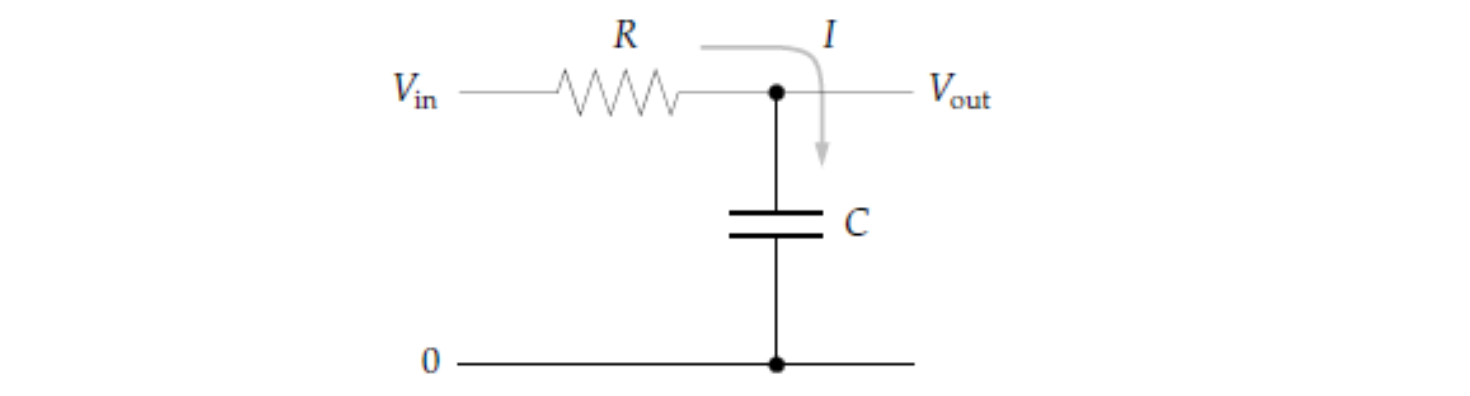

This circuit acts as a low-pass filter: you send a signal in on the left and it comes out filtered on the right.   
Using Ohm's law and the capacitor law and assuming that the output load has very high impedance, so that a negligible amount of current flows through it, we can write down the equations governing this circuit as follows. Let $I$ be the current that flows through $R$ and into the capacitor, and let $Q$ be the charge on the capacitor. Then:  
\begin{align}
    IR & = V_{in} - V_{out} & Q &= CV_{out} & I & = \text{D}_t Q
\end{align}
Substituting the second equation into the third, then substituting the result into the first equation, we find that $V_{in} - V_{out} = RC (\text{D}_t V_{out})$, or equivalently
\begin{gather}
    \text{D}_t V_{out} = (V_{in} - V_{out})/RC
\end{gather}
**a)** Write a program (or modify a previous one) to solve this equation for $V_{out}(t)$ using the fourth-order Runge-Kutta method when in the input signal is a square-wave with frequency 1 and amplitude 1: 
\begin{gather}
    V_{in}(t)
    \begin{cases} 
    &1 &  & \text{if } \lfloor 2t \rfloor \text{ is even,} \\
    &-1 &  & \text{if} \lfloor 2t \rfloor \text{is odd,} 
    \end{cases}
\end{gather}
where $\lfloor x \rfloor$ means $x$ rounded down to the next lowest integer. Use the program to make plots of the output of the filter circuit from $t = 0s$ to $t = 10s$ when $RC = 0.01, 0.1, \text{ and } 1$, with initial condition $V_{out}(0) = 0$. You will have to make a decision about what value of $h$ to use in your calculation. Small values give more accurate results, but the program will take longer to run. Try a variety of different values and choose one for your final calculations that seems sensible to you.
*** 

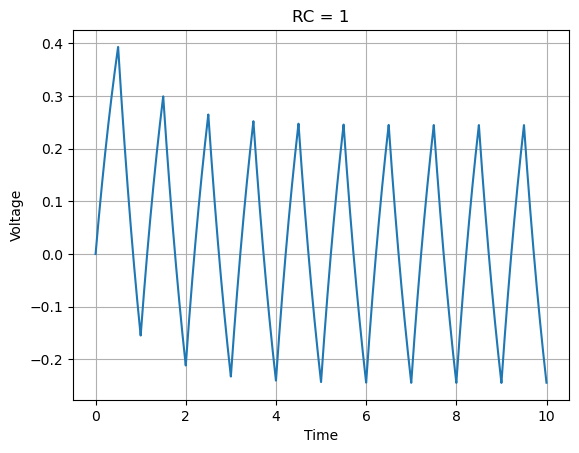

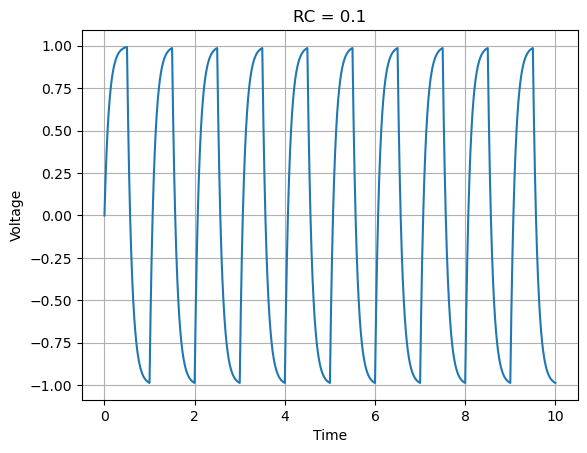

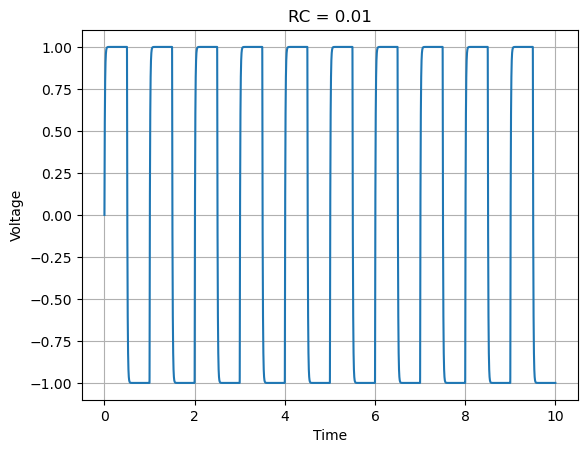

In [6]:
# cell 1 

import numpy as np
import pylab as plt

def f(V, t, RC):
    """
    Differential equation function
    
    input:
        V (float): Voltage at time t.
        t (float): Current time.
        RC (float): Time constant RC.
        
    output:
        Rate of change of voltage.
    """
    x = int(2 * t)
    if x % 2 == 0:
        V_0 = 1
    else:
        V_0 = -1
    return (V_0 - V) / RC

    # parameters
a = 0            # start point
b = 10           # end point
N = 10_000       # number of slices
h = (b - a) / N  # slice width

tp = np.arange(a, b, h)

    # different values of RC
RC_values = [1, 0.1, 0.01]

    # Iteration and plotting 
for RC in RC_values:
    Vp = []  # List of voltage values
    V = 0    # Initial voltage
    
        # Runge-Kutta
    for t in tp:
        Vp.append(V)
        k1 = h * f(V, t, RC)
        k2 = h * f(V + 0.5*k1, t + 0.5*h, RC)
        k3 = h * f(V + 0.5*k2, t + 0.5*h, RC)
        k4 = h * f(V + k3, t + h, RC)
        V += (k1 + 2*k2 + 2*k3 + k4) / 6

        # Plot
    plt.title(f"RC = {RC}")
    plt.plot(tp, Vp)
    plt.xlabel('Time')
    plt.ylabel('Voltage')
    plt.grid(True)
    plt.show()

**b)** Based on the graphs produced by your program, describe what you see and explain what the circuit is doing.   
A program similar to the one you wrote is running inside most stereos and music players, to create the effect of the "bass" control. In the old days, the bass control on a stereo would have been connected to a real electronic low-pass filter in the amplifier circuitry, but these days there is just a computer processor that simulates the behavior of the filter in a manner similar to your program. 
***

### Exercise 8.2: 
The Lotka-Volterra equations   
The Lotka-Volterra equations are a mathematical model of predator-prey interactions between biological species. Let two variables $x$ and $y$ be proportional to the size of the populations of two species, traditionally called "rabbits" (the prey) and "foxes" (the predators). You could think of $x$ and $y$ as being the population in thousands, say, so that $x = 2$ means there are $2000$ rabbits. Strictly the only allowed values of $x$ and $y$ would then be multiples of $0.001$, since you can only have whole numbers of rabbits or foxes. But $0.001$ is a pretty close spacing of values, so it's a decent approximation to treat x and y as continuous real numbers so long as neither gets very close to zero.   
In the Lotka-Volterra model the rabbits reproduce at a rate proportional to their popula-tion, but are eaten by the foxes at a rate proportional to both their own population and the population of foxes:
\begin{gather}
    \text{D}_t x = \alpha x - \beta x y 
\end{gather}
where $\alpha$ and $\beta$ are constants. At the same time the foxes reproduce at a rate proportional the rate at which they eat rabbits— because they need food to grow and reproduce-but also die of old age at a rate proportional to their own population:
\begin{gather}
    \text{D}_t y = \gamma x y - \delta y 
\end{gather}
where $\gamma$ and $\delta$ are also constants.   
**a)** Write a program to solve these equations using the fourth-order Runge-Kutta method for
the case $\alpha = 1$, $\beta = \gamma = 0.5$, and $\delta = 2$, starting from the initial condition $x = y = 2$. Have the program make a graph showing both x and y as a function of time on the same axes from $t = 0 s$ to $t = 30 s$. (Hint: Notice that the differential equations in this case do not depend explicitly on time —in vector notation, the right-hand side of each equation is a function $f(\vec{r})$ with no t dependence. You may nonetheless find it convenient to define a Python function f(r, t) including the time variable, so that your program takes the same form as programs given earlier in this chapter. You don't have to do it that way, but it can avoid some confusion. Several of the following exercises have a similar lack of explicit time-dependence.)
***

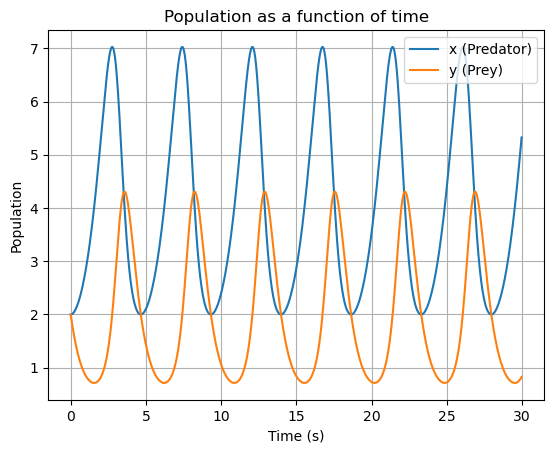

In [10]:
# cell 2

import numpy as np
import pylab as plt

def f(r, t):
    """
    Lotka-Volterra differential equation
    
    input:
        r (array): Array containing the variables x and y.
        t (float): Time variable.
        
    output:
        Array containing the rates of change of x and y.
    """
    x = r[0]
    y = r[1]
    
        # Parameters
    alpha = 1
    beta = 0.5
    gamma = 0.5
    delta = 2
    
        # Differential equations
    fx = alpha*x - beta*x*y  # Predator equation
    fy = gamma*x*y - delta*y # Prey equation
    
    return np.array([fx, fy], float)

    # parameters
a = 0            # start point
b = 30           # end point
N = 1000         # number of slices
h = (b - a) / N  # slice width

tp = np.arange(a, b, h)
xp = []  # List of x values
yp = []  # List of y values

    # Initial conditions
r = np.array([2, 2], float)

    # Runge-Kutta 
for t in tp:
    xp.append(r[0])
    yp.append(r[1])
    k1 = h * f(r, t)
    k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(r + k3, t + h)
    r += (k1 + 2 * k2 + 2 * k3 + k4) / 6

    # Plot x and y as a function of time
plt.title("Population as a function of time")
plt.xlabel("Time (s)")
plt.ylabel("Population")
plt.plot(tp, xp, label='x (Predator)')
plt.plot(tp, yp, label='y (Prey)')
plt.legend()
plt.grid(True)
plt.show()

**b)** Describe in words what is going on in the system, in terms of rabbits and foxes.
***

In this model, it is assumed that the population of these two animals depends solely on each other. For the predator population to increase, it needs a substantial amount of prey to feed on. If it consumes a lot of prey, its population will start to increase; the more it eats, the faster it increases. However, this causes the prey population to decrease. This is what we observe; the minimum of the dotted graph coincides with the point of steepest slope for the blue graph.

### Exercise 8.4: 
Building on the results from Example 8.6 above, calculate the motion of a nonlinear pendulum as follows.  
**a)** Write a program to solve the two first-order equations, Eqs. (8.45) and (8.46), using the fourth-order Runge-Kutta method for a pendulum with a $10 cm$ arm. Use your program to calculate the angle $\theta$ of displacement for several periods of the pendulum when it is released from a standstill at $\theta = 179^{\circ}$ from the vertical. Make a graph of $\theta$ as a function of time.   
***

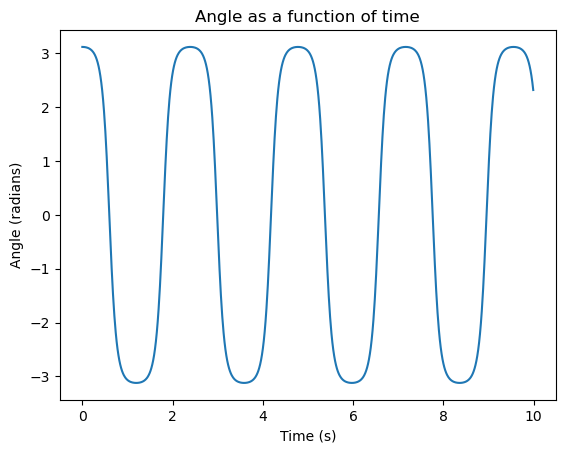

In [14]:
# cell 3

import numpy as np
import pylab as plt

    # Constants
g = 9.8  # gravitational acceleration (m/s^2)
l = 0.1  # Length of the pendulum arm (m)

def f(r, t):
    """
    pendulum motion differential equation
    
    input:
        r (array): Array containing the variables theta and omega.
        t (float): Time variable.
        
    output:
        Array containing the rates of change of theta and omega
    """
    theta = r[0]
    omega = r[1]
    
        # Differential equations
    ftheta = omega
    fomega = - (g / l) * np.sin(theta)
    
    return np.array([ftheta, fomega], float)

    # parameters
a = 0            # Start time 
b = 10           # End time 
N = 1000         # Number of time steps
h = (b - a) / N  # Time step size

tp = np.arange(a, b, h)  # Time array
xp = []  # List to store theta values
yp = []  # List to store omega values

    # Initial conditions
r = np.array([3.12, 0], float)  

    # Runge-Kutta method 
for t in tp:
    xp.append(r[0])
    yp.append(r[1])
    k1 = h * f(r, t)
    k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(r + k3, t + h)
    r += (k1 + 2 * k2 + 2 * k3 + k4) / 6

    # Plot theta as a function of time
plt.title("Angle as a function of time")
plt.xlabel("Time (s)")
plt.ylabel("Angle (radians)")
plt.plot(tp, xp)
plt.show()

### Exercise 8.5: 
The driven pendulum   
A pendulum like the one in Exercise 8.4 can be driven by, for example, exerting a small oscil-lating force horizontally on the mass. Then the equation of motion for the pendulum becomes 
\begin{gather}
    \text{D}_t^2\theta = -(g/l) \sin{\theta} + C \cos{\theta} \sin{\Omega t}
\end{gather}
where $C$ and $\Omega$ are constants.   
**a)** Write a program to solve this equation for $\theta$ as a function of time with $l = 10 cm$, $C = 2s^{-2}$ and $\Omega = 5s^{-1}$ and make a plot of $\theta$ as a function of time from $t = 0 s$ to $t = 100 s$.
Start the pendulum at rest with $\theta = 0$ and $\text{D}_t\theta = 0$.
***

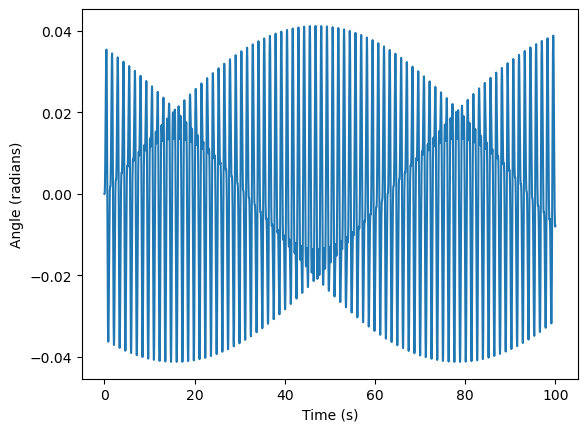

In [18]:
# cell 4
import numpy as np
import pylab as plt

# Constants
g = 9.8  # Acceleration due to gravity (m/s^2)
l = 0.1  # Length of the pendulum arm (m)
C = 2    # Constant for the driving force (s^-2)
Omega = 5  # Angular frequency of the driving force (rad/s)

def f(r, t):
    """
    Define the differential equations for the driven pendulum motion.
    
    Args:
        r (array): Array containing the variables theta and omega.
        t (float): Time variable.
        
    Returns:
        array: Array containing the rates of change of theta and omega.
    """
    theta = r[0]  # Angle of the pendulum
    omega = r[1]  # Angular velocity of the pendulum
    
    # Differential equations
    ftheta = omega
    fomega = - (g/l) * np.sin(theta) + C * np.cos(theta) * np.sin(Omega * t)
    
    return np.array([ftheta, fomega], float)

# Simulation parameters
a = 0         # Start time (s)
b = 100       # End time (s)
N = 10000     # Number of time steps
h = (b - a) / N  # Time step size

tp = np.arange(a, b, h)  # Time array
xp = []  # List to store theta values
yp = []  # List to store omega values

# Initial conditions
r = np.array([0, 0], float)  # Initial angle and angular velocity

# Runge-Kutta method for numerical integration
for t in tp:
    xp.append(r[0])
    yp.append(r[1])
    k1 = h * f(r, t)
    k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(r + k3, t + h)
    r += (k1 + 2 * k2 + 2 * k3 + k4) / 6

# Plot theta as a function of time
plt.xlabel("Time (s)")
plt.ylabel("Angle (radians)")
plt.plot(tp, xp)
plt.show()

**b)** Now change the value of $\Omega$, while keeping $C$ the same, to find a value for which the pendulum resonates with the driving force and swings widely from side to side. Make a plot for this case also.
***

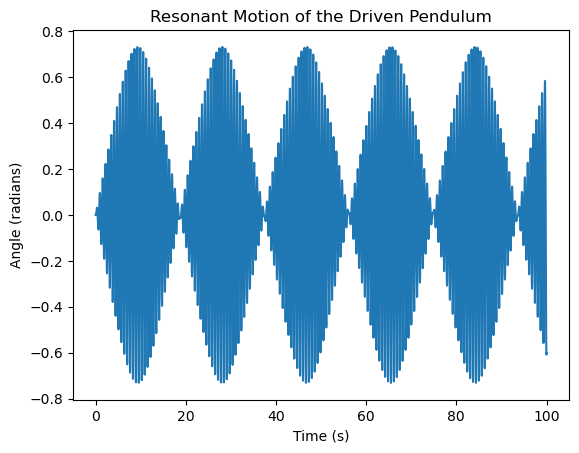

In [17]:
import numpy as np
import pylab as plt

# Constants
g = 9.8  # Acceleration due to gravity (m/s^2)
l = 0.1  # Length of the pendulum arm (m)
C = 2    # Constant for the driving force (s^-2)
Omega_resonant = 10.0  # Resonant frequency of the driving force (rad/s)

def f(r, t):
    """
    Define the differential equations for the driven pendulum motion.
    
    Args:
        r (array): Array containing the variables theta and omega.
        t (float): Time variable.
        
    Returns:
        array: Array containing the rates of change of theta and omega.
    """
    theta = r[0]  # Angle of the pendulum
    omega = r[1]  # Angular velocity of the pendulum
    
    # Differential equations
    ftheta = omega
    fomega = - (g/l) * np.sin(theta) + C * np.cos(theta) * np.sin(Omega_resonant * t)
    
    return np.array([ftheta, fomega], float)

# Simulation parameters
a = 0         # Start time (s)
b = 100       # End time (s)
N = 10000     # Number of time steps
h = (b - a) / N  # Time step size

tp = np.arange(a, b, h)  # Time array
xp = []  # List to store theta values
yp = []  # List to store omega values

# Initial conditions
r = np.array([0, 0], float)  # Initial angle and angular velocity

# Runge-Kutta method for numerical integration
for t in tp:
    xp.append(r[0])
    yp.append(r[1])
    k1 = h * f(r, t)
    k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(r + k3, t + h)
    r += (k1 + 2 * k2 + 2 * k3 + k4) / 6

# Plot theta as a function of time
plt.xlabel("Time (s)")
plt.ylabel("Angle (radians)")
plt.plot(tp, xp)
plt.title("Resonant Motion of the Driven Pendulum")
plt.show()
